# ***projekt numerik***

In [52]:
#%matplotlib widget
import numpy as np
from matplotlib import pyplot as plt
import constants as cst

## ***Implicit model***

In [53]:
# delta's discretisation

delta_t = 0.5
delta_r = 0.01
n = 4

def t_i(i):
    return i*delta_t

def r_j(j):
    return j*delta_r

#T_i_plus_one = np.zeros((n-1,n-1))


##  Constants and their implementations



In [54]:
#Dichte nach Radius
def rho(dist):

    #dichte;

    if(0.0 <=dist <= 0.025):
        return float(cst.WASSER[0])

    if((0.025 < dist <= 0.030) or (0.055< dist) ):
        return float(cst.STAHL[0])

    if(0.030 < dist <= 0.055):
        return float(cst.GLASSWOLLE[0])


# Wärmekapazität nach Radius
def c_p(dist):

    #cap;

    if(0.0 <= dist <= 0.025):
        return float(cst.WASSER[1])

    if((0.025 < dist <= 0.030) or (0.055 < dist) ):
        return float(cst.STAHL[1])

    if(0.030 < dist <= 0.055):
        return float(cst.GLASSWOLLE[1])




#Wärmeleitungskonstante nach Radius
def Lambda(dist):

    

    if(0.0 <= dist <= 0.025):
        return float(cst.WASSER[2])

    if((0.025 < dist <= 0.030) or (0.055< dist) ):
        return  float(cst.STAHL[2])

    if(0.030 < dist <= 0.055):
        return  float(cst.GLASSWOLLE[2])



## Definition of the function of time and its implementation



In [55]:
Gt=20
n = int(cst.size_rhor/delta_r)
time =int(100 / delta_t)

## explicit

$T_{i+1,j} = u_j \frac{r_j}{\Delta r^2}T_{i,j-1} + [1-u_j(\frac{1}{\Delta r} + \frac{2r_j}{\Delta r^2})]T_{i,j} + u_j(\frac{1}{\Delta r}+ \frac{r_j}{\Delta r^2})T_{i,j+1}$


for $u_j = \frac{\Delta t}{r_j}k_j$ and $k_j = \frac{\lambda _j}{Cp_{j} \rho _j}$

In [56]:
T = np.zeros([time+1,n+1])
T[0, :] = 0
T[0, n] = Gt

print(T[0,:])

for i in range(0,time):

    T[i][n] = Gt

    for j in range(1,n):

        r = r_j(j)
        k_j = Lambda(r) / (c_p(r)*rho(r))
        u_j = (delta_t*k_j) / r

        A = T[i][j-1]
        B = T[i][j]
        C = T[i][j+1]
    
        T[i+1][j] = u_j*r/(delta_r**2)*A + (1-u_j*(1/delta_r + 2*r/delta_r**2))*B + u_j*(1/delta_r + r/delta_r**2)*C

    T[i+1, 0] = T[i+1, 1]  
    T[i+1, n] = Gt


[ 0.  0.  0.  0.  0.  0. 20.]


(201, 7) (201, 7)


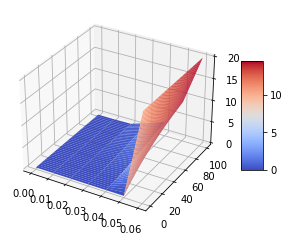

In [57]:
from matplotlib import cm
# Graphische Darstellung
x = np.array(range(n+1))*delta_r
t = np.array(range(time+1))*delta_t

xA, tA = np.meshgrid(x, t)
print(tA.shape, xA.shape)

# Plot the surface.
fig1, ax = plt.subplots(subplot_kw={"projection": "3d"}, num=1)
surf = ax.plot_surface(xA, tA, T,cmap=cm.coolwarm)
fig1.colorbar(surf, shrink=0.5, aspect=5)

In [58]:
import math as mt
T = np.zeros([time+1,n+1])
T[0, :] = 0
T[0, n] = 0

print(T[0,:])

for i in range(0,time):

    T[i][n] = 20*mt.sin(2*3.14159265*i)

    for j in range(1,n):

        r = r_j(j)
        k_j = Lambda(r) / (c_p(r)*rho(r))
        u_j = (delta_t*k_j) / r

        A = T[i][j-1]
        B = T[i][j]
        C = T[i][j+1]
    
        T[i+1][j] = u_j*r/(delta_r**2)*A + (1-u_j*(1/delta_r + 2*r/delta_r**2))*B + u_j*(1/delta_r + r/delta_r**2)*C

    T[i+1, 0] = T[i+1, 1]  
    T[i+1, n] = 20*mt.sin(2*3.14159265*(i))

[0. 0. 0. 0. 0. 0. 0.]


(201, 7) (201, 7)


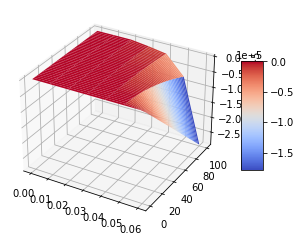

In [59]:
# Graphische Darstellung
x = np.array(range(n+1))*delta_r
t = np.array(range(time+1))*delta_t

xA, tA = np.meshgrid(x, t)
print(tA.shape, xA.shape)

# Plot the surface.
fig2, ax = plt.subplots(subplot_kw={"projection": "3d"}, num=1)
surf = ax.plot_surface(xA, tA, T,cmap=cm.coolwarm)
fig2.colorbar(surf, shrink=0.5, aspect=5)

## implicit

$-w_j T_{i+1,j-1} + (1+v_j+2w_j) T_{i+1,j}-(v_j+w_j)T_{i+1,j+1}=T_{i,j}$

With $v_j = \frac{u_j}{\Delta r}$ , $w_j=2r_j \frac{u_j}{\Delta r^2}$ and $u_j = \frac{\lambda_j \Delta t}{r_j C_{p,j} \rho_j}$

In [64]:
from scipy.linalg import lu_factor, lu_solve, lu

A = np.zeros([n-1,n-1])



def U_j(r):
    return (Lambda(r) * delta_t)/(r*rho(r)*c_p(r))

def V_j(r,uj):
    return uj/delta_r

def W_j (r,uj):
    return (2*r*uj)/(delta_r**2)



for j in range (0,n-1):

    r = r_j(j+1)
    Uj = U_j(r)
    Vj = V_j(r,Uj)
    Wj = W_j(r,Uj)

    A[j,j] = 1+Vj+2*Wj
#first coeff.
    if j == 0:
        A[j,j]= 1+Vj+Wj
#upper diagonal
    if (j+1) <= (n-2):
        A[j,j+1] = -(Vj+Wj)
#lower diagonal  
    if j-1 >= 0:
        A[j,j-1] = -Wj

print(A)
#print(A[n-2,n-2])
lu_A, P = lu_factor(A)
print(lu_A,P)

T = np.zeros([time+1,n+1])
T[0, :] = 0

r_final = r_j(n-1)
U_final = U_j(0.005)
Vfinal = V_j(r_final,U_final)
Wfinal = W_j(r_final,U_final)
#T[:,n] = Gt*(Vfinal+Wfinal) #boundary conditions at R. Here we use n-1 since the iteration goes from 0 to n-1
b=np.zeros(n-1)
#print(b.shape)
#print(T[0,:])
T[:,-1]=Gt
for i in range (1,time):
    
    b = T[i,1:n]
    #print(b,"before")
    b[-1] += Gt*(Vfinal+Wfinal)
    #rint(b,"after")
    T[i+1,1:n] = lu_solve((lu_A,P),b) 
    T[i+1,0] = T[i+1,1]
    T[i,n] = Gt

    #print(b)
print(T.shape)


[[ 1.00214459 -0.00214459  0.          0.          0.        ]
 [-0.00142972  1.00321688 -0.00178715  0.          0.        ]
 [ 0.         -0.04079161  1.08838182 -0.04759021  0.        ]
 [ 0.          0.         -0.00651042  1.01383464 -0.00732422]
 [ 0.          0.          0.         -0.00651042  1.01367188]]
[[ 1.00214459 -0.00214459  0.          0.          0.        ]
 [-0.00142666  1.00321382 -0.00178715  0.          0.        ]
 [ 0.         -0.04066093  1.08830915 -0.04759021  0.        ]
 [ 0.          0.         -0.00598214  1.01354994 -0.00732422]
 [ 0.          0.          0.         -0.00642338  1.01362483]] [0 1 2 3 4]
(201, 7)


(201, 7) (201, 7)


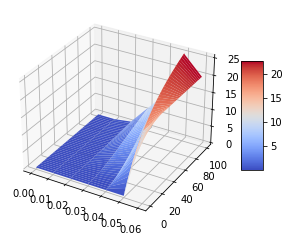

In [61]:
# Graphische Darstellung
x = np.array(range(n+1))*delta_r
t = np.array(range(time+1))*delta_t

xA, tA = np.meshgrid(x, t)
print(tA.shape, xA.shape)

# Plot the surface.
fig3, ax = plt.subplots(subplot_kw={"projection": "3d"}, num=1)
surf = ax.plot_surface(xA, tA, T,cmap=cm.coolwarm)
fig3.colorbar(surf, shrink=0.5, aspect=5)

In [66]:
from scipy.linalg import lu_factor, lu_solve, lu

A = np.zeros([n-1,n-1])



def U_j(r):
    return (Lambda(r) * delta_t)/(r*rho(r)*c_p(r))

def V_j(r,uj):
    return uj/delta_r

def W_j (r,uj):
    return (2*r*uj)/(delta_r**2)



for j in range (0,n-1):

    r = r_j(j+1)
    Uj = U_j(r)
    Vj = V_j(r,Uj)
    Wj = W_j(r,Uj)

    A[j,j] = 1+Vj+2*Wj
#first coeff.
    if j == 0:
        A[j,j]= 1+Vj+Wj
#upper diagonal
    if (j+1) <= (n-2):
        A[j,j+1] = -(Vj+Wj)
#lower diagonal  
    if j-1 >= 0:
        A[j,j-1] = -Wj

print(A)
#print(A[n-2,n-2])
lu_A, P = lu_factor(A)
print(lu_A,P)

T = np.zeros([time+1,n+1])
T[0, :] = 0

r_final = r_j(n-1)
U_final = U_j(0.005)
Vfinal = V_j(r_final,U_final)
Wfinal = W_j(r_final,U_final)
#T[:,n] = Gt*(Vfinal+Wfinal) #boundary conditions at R. Here we use n-1 since the iteration goes from 0 to n-1
b=np.zeros(n-1)
#print(b.shape)
#print(T[0,:])

T[:,-1] = 0

for i in range (1,time):
    
    b = T[i,1:n]
    #print(b,"before")
    b[-1] += Gt*(Vfinal+Wfinal)
    #rint(b,"after")
    T[i+1,1:n] = lu_solve((lu_A,P),b) 
    T[i+1,0] = T[i+1,1]
    T[i,n] = 20*mt.sin(2*3.14159265*i)

    #print(b)

T[-1,-1] = 20*mt.sin(2*3.14159265*(time+1))


[[ 1.00214459 -0.00214459  0.          0.          0.        ]
 [-0.00142972  1.00321688 -0.00178715  0.          0.        ]
 [ 0.         -0.04079161  1.08838182 -0.04759021  0.        ]
 [ 0.          0.         -0.00651042  1.01383464 -0.00732422]
 [ 0.          0.          0.         -0.00651042  1.01367188]]
[[ 1.00214459 -0.00214459  0.          0.          0.        ]
 [-0.00142666  1.00321382 -0.00178715  0.          0.        ]
 [ 0.         -0.04066093  1.08830915 -0.04759021  0.        ]
 [ 0.          0.         -0.00598214  1.01354994 -0.00732422]
 [ 0.          0.          0.         -0.00642338  1.01362483]] [0 1 2 3 4]


(201, 7) (201, 7)


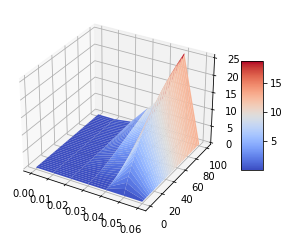

In [67]:
# Graphische Darstellung
x = np.array(range(n+1))*delta_r
t = np.array(range(time+1))*delta_t

xA, tA = np.meshgrid(x, t)
print(tA.shape, xA.shape)

# Plot the surface.
fig3, ax = plt.subplots(subplot_kw={"projection": "3d"}, num=1)
surf = ax.plot_surface(xA, tA, T,cmap=cm.coolwarm)
fig3.colorbar(surf, shrink=0.5, aspect=5)